Assignment one: Data Visualisation

This aim to answer the question: "How is economic growth related to internet usage" by analysing data from four EU Countries for the period 2009 to 2023 inclusive.

In [57]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Required libraries are imported.

In [58]:
# loading data
df = pd.read_excel('dataset_CA1.xlsx')

# checking the first 5 rows of the data
print(df.head())

                                        Series Name        Series Code  \
0                             GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
1                             GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
2                             GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
3                             GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
4  Individuals using the Internet (% of population)     IT.NET.USER.ZS   

  Country Name Country Code       2009       2010       2011       2012  \
0      Czechia          CZE  -4.798324   2.714665   1.772381  -0.770668   
1      Finland          FIN  -8.076031   3.168288   2.390395  -1.522840   
2      Ireland          IRL  -5.095782   1.682972   1.648774  -0.398960   
3        Italy          ITA  -5.305154   1.529106   0.695463  -3.125239   
4      Czechia          CZE  64.400000  68.800000  70.500000  73.400000   

        2013       2014       2015       2016       2017       2018  \
0  -0.041812   2.245212   4.95875

The data in excel file is loaded and save into dataFrame (df), first five rows and basic information checked to verify dataset information.

In [59]:
# looking at the shape
print('Shape of data:', df.shape)

# looking at the list of columns
print('Columns:', df.columns.tolist())

# basic data information
print('\nData information:')
print(df.info())

Shape of data: (40, 19)
Columns: ['Series Name', 'Series Code', 'Country Name', 'Country Code', 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Series Name   40 non-null     object 
 1   Series Code   40 non-null     object 
 2   Country Name  40 non-null     object 
 3   Country Code  40 non-null     object 
 4   2009          40 non-null     float64
 5   2010          40 non-null     float64
 6   2011          40 non-null     float64
 7   2012          40 non-null     float64
 8   2013          40 non-null     float64
 9   2014          40 non-null     float64
 10  2015          40 non-null     float64
 11  2016          40 non-null     float64
 12  2017          40 non-null     float64
 13  2018          40 non-null     float64
 14 

Shape of the dataset is checked to know the number of rows and columns. Also, list of columns is checked to know the columns and data information is checked to know the data type of each column. The data is seen to be in a wide format, which need to be transformed to a long format for better analysis.

In [60]:
# changing data to long format
df_long = df.melt(id_vars=["Series Name", "Series Code", "Country Name", "Country Code"], 
                  var_name="Year", 
                  value_name="Value")

# changing Year column to integer
df_long["Year"] = df_long["Year"].astype(int)

# changing Value column to numeric and coercing errors to nan
df_long["Value"] = pd.to_numeric(df_long["Value"], errors="coerce")

# pivoting data for each indicator (Series Name) to become a separate column
df_pivot = df_long.pivot_table(index=["Country Name", "Country Code", "Year"], 
                               columns="Series Name", 
                               values="Value",
                               aggfunc="mean").reset_index()

# checking the data
print('\nPivoted data:')
print(df_pivot.head()) 


Pivoted data:
Series Name Country Name Country Code  Year  \
0                Czechia          CZE  2009   
1                Czechia          CZE  2010   
2                Czechia          CZE  2011   
3                Czechia          CZE  2012   
4                Czechia          CZE  2013   

Series Name  Current health expenditure (% of GDP)  \
0                                         7.248806   
1                                         7.586473   
2                                         7.558022   
3                                         7.624483   
4                                         7.521324   

Series Name  Exports of goods and services (% of GDP)  GDP growth (annual %)  \
0                                           58.475784              -4.798324   
1                                           64.891598               2.714665   
2                                           70.250638               1.772381   
3                                           75.104810    

Dataset reshaped to long format using melt function with variable name as Year instead of the individual years and Value as the value for the years. The year column is then converted to integer data type. Value column is cleaned by converting to numeric and missing values are filled with nan. The dataset is then pivoted to have a column for each indicator (GeeksforGeeks, n.d.). 

In [61]:
# checking for duplicates
print('Number of duplicates:', df_pivot.duplicated().sum())

# checking missing values
print('Missing values:')
print(df_pivot.isnull().sum())

Number of duplicates: 0
Missing values:
Series Name
Country Name                                                        0
Country Code                                                        0
Year                                                                0
Current health expenditure (% of GDP)                               6
Exports of goods and services (% of GDP)                            0
GDP growth (annual %)                                               0
High-technology exports (% of manufactured exports)                 0
Individuals using the Internet (% of population)                    0
Population growth (annual %)                                        0
Research and development expenditure (% of GDP)                     8
Tax revenue (% of GDP)                                              4
Unemployment, total (% of total labor force) (national estimate)    0
Urban population growth (annual %)                                  0
dtype: int64


Panel dataset is checked for duplicates and missing values. No duplicates are found but missing values are found in the Value column (Ford, 2025). 

In [62]:
# filling missing values with mean values
df_pivot['Current health expenditure (% of GDP)'] = df_pivot['Current health expenditure (% of GDP)'].fillna(df_pivot['Current health expenditure (% of GDP)'].mean())
df_pivot['Research and development expenditure (% of GDP)'] = df_pivot['Research and development expenditure (% of GDP)'].fillna(df_pivot['Research and development expenditure (% of GDP)'].mean())
df_pivot['Tax revenue (% of GDP)'] = df_pivot['Tax revenue (% of GDP)'].fillna(df_pivot['Tax revenue (% of GDP)'].mean())

# checking missing values
print('Missing values:')
print(df_pivot.isnull().sum())

Missing values:
Series Name
Country Name                                                        0
Country Code                                                        0
Year                                                                0
Current health expenditure (% of GDP)                               0
Exports of goods and services (% of GDP)                            0
GDP growth (annual %)                                               0
High-technology exports (% of manufactured exports)                 0
Individuals using the Internet (% of population)                    0
Population growth (annual %)                                        0
Research and development expenditure (% of GDP)                     0
Tax revenue (% of GDP)                                              0
Unemployment, total (% of total labor force) (national estimate)    0
Urban population growth (annual %)                                  0
dtype: int64


The found missing values are filled with the mean of the column. The dataset is then checked for missing values again and none is found.

In [63]:
# renaming columns
df_pivot.rename(columns={
    'Country Name': 'country_Name',
    'Country Code': 'country_Code',
    'Year': 'year',
    'Current health expenditure (% of GDP)': 'health_Expenditure',
    'Exports of goods and services (% of GDP)': 'exports',
    'GDP growth (annual %)': 'gdp_Growth',
    'High-technology exports (% of manufactured exports)': 'high_Tech_Exports',
    'Individuals using the Internet (% of population)': 'internet_Usage',
    'Population growth (annual %)': 'pop_Growth',
    'Research and development expenditure (% of GDP)': 'research_Development',
    'Tax revenue (% of GDP)': 'tax_Revenue',
    'Unemployment, total (% of total labor force) (national estimate)': 'unemployment_Rate',
    'Urban population growth (annual %)': 'urban_Population_Growth'    
}, inplace=True)

# checking basic information of the panel dataset after cleaning and transformation
print('\nPivoted data information:')
print(df_pivot.info())

# saving the cleaned data
print('\nData saved to "data_clean.xlsx" successfully.')
df_pivot.to_excel('data_clean.xlsx', index=False)


Pivoted data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country_Name             60 non-null     object 
 1   country_Code             60 non-null     object 
 2   year                     60 non-null     int64  
 3   health_Expenditure       60 non-null     float64
 4   exports                  60 non-null     float64
 5   gdp_Growth               60 non-null     float64
 6   high_Tech_Exports        60 non-null     float64
 7   internet_Usage           60 non-null     float64
 8   pop_Growth               60 non-null     float64
 9   research_Development     60 non-null     float64
 10  tax_Revenue              60 non-null     float64
 11  unemployment_Rate        60 non-null     float64
 12  urban_Population_Growth  60 non-null     float64
dtypes: float64(10), int64(1), object(2)
memory usage: 6.2+ 

Columns are renamed to have more meaningful names. basic information is checked again to verify the changes made (Kaggle, n.d.).

In [ ]:
# descriptive statistics of continuous variables
print('\nDescriptive statistics of continuous variables:')  
print(df_pivot[['health_Expenditure', 'exports', 'gdp_Growth', 'high_Tech_Exports', 'internet_Usage', 'pop_Growth', 'research_Development', 'tax_Revenue', 'unemployment_Rate','urban_Population_Growth']].describe())

# descriptive statistics of categorical variables
print('\nDescriptive statistics of categorical variables:') 
print(df_pivot['country_Name'].describe())


Descriptive statistics of continuous variables:
Series Name  health_Expenditure     exports  gdp_Growth  high_Tech_Exports  \
count                 60.000000   60.000000   60.000000          60.000000   
mean                   8.626785   64.796420    1.872539          16.791877   
std                    1.108490   36.209237    5.284757           9.295502   
min                    6.070610   22.277160   -8.868221           7.471226   
25%                    7.579360   35.279252   -0.418737           9.125980   
50%                    8.775000   52.285795    1.489577          17.103585   
75%                    9.380000   84.402318    3.202058          22.665532   
max                   10.606150  136.684440   24.615570          47.773773   

Series Name  internet_Usage  pop_Growth  research_Development  tax_Revenue  \
count             60.000000   60.000000             60.000000    60.000000   
mean              78.608333    0.441685              1.900367    19.598429   
std           

The descriptive statistics of the key continuous variable of gdp_Growth show some negative growth values which is common in economic growth data. The internet_Usage variable has a high minimum value of 48.8 and a high maximum value of 96.6 with a mean of 78.6 that is expected as the percentage of population using the internet is high in the EU countries as far back as 2009. The categorical variable of country has four unique values and because it is a structured panel dataset, the year variable has 15 unique values, considering the dataset contains data for the period 2009 to 2023 inclusive (Ford, 2025).

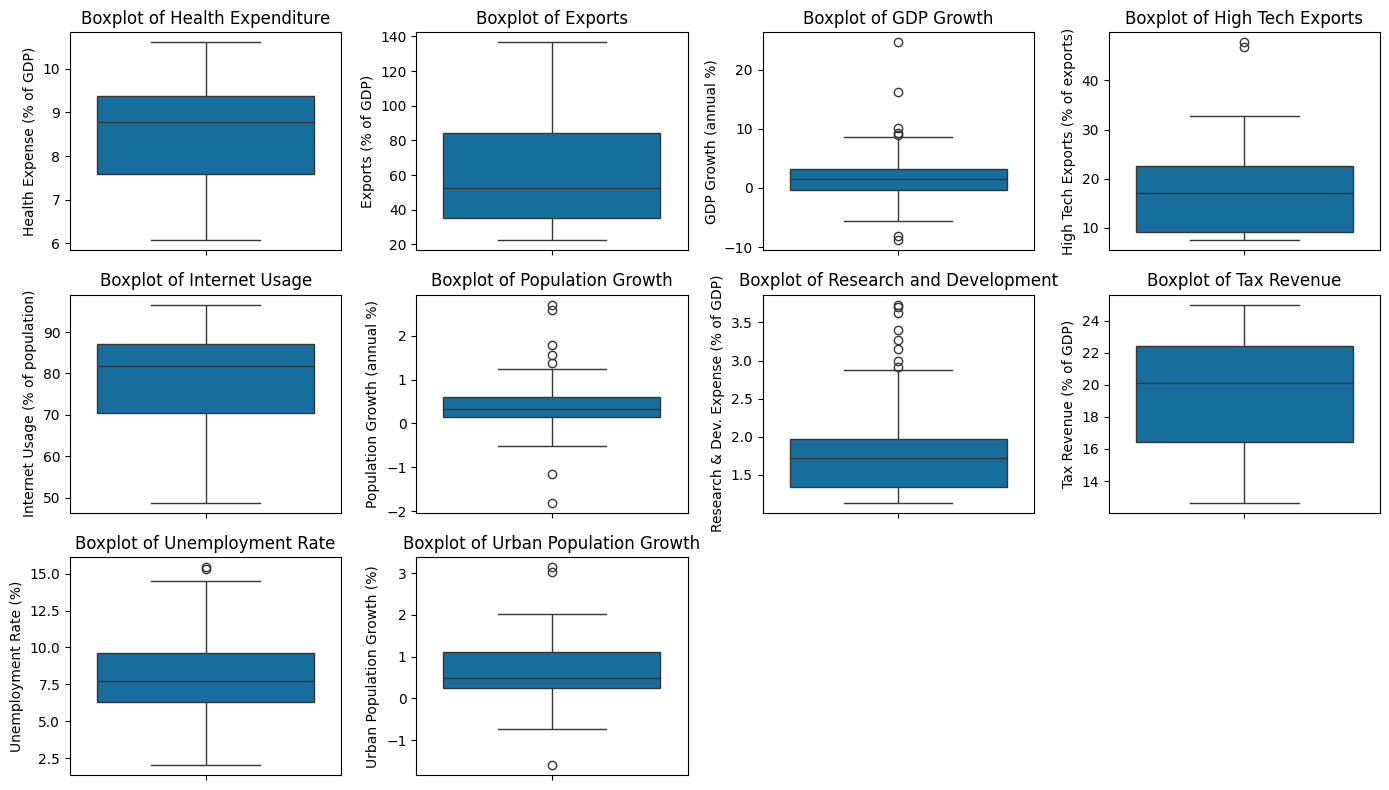

In [64]:
# global colourblind-friendly palette used for plots
sns.set_palette('colorblind')

# variables to plot
variables = ['health_Expenditure', 'exports', 'gdp_Growth', 'high_Tech_Exports', 
             'internet_Usage', 'pop_Growth', 'research_Development', 
             'tax_Revenue', 'unemployment_Rate', 'urban_Population_Growth']

# labels for the plots
titles = {
    'health_Expenditure': 'Boxplot of Health Expenditure',
    'exports': 'Boxplot of Exports',
    'gdp_Growth': 'Boxplot of GDP Growth',
    'high_Tech_Exports': 'Boxplot of High Tech Exports',
    'internet_Usage': 'Boxplot of Internet Usage',
    'pop_Growth': 'Boxplot of Population Growth',
    'research_Development': 'Boxplot of Research and Development',
    'tax_Revenue': 'Boxplot of Tax Revenue',
    'unemployment_Rate': 'Boxplot of Unemployment Rate',
    'urban_Population_Growth': 'Boxplot of Urban Population Growth'
}

ylabels = {
    'health_Expenditure': 'Health Expense (% of GDP)',
    'exports': 'Exports (% of GDP)',
    'gdp_Growth': 'GDP Growth (annual %)',
    'high_Tech_Exports': 'High Tech Exports (% of exports)',
    'internet_Usage': 'Internet Usage (% of population)',
    'pop_Growth': 'Population Growth (annual %)',
    'research_Development': 'Research & Dev. Expense (% of GDP)',
    'tax_Revenue': 'Tax Revenue (% of GDP)',
    'unemployment_Rate': 'Unemployment Rate (%)',
    'urban_Population_Growth': 'Urban Population Growth (%)'
}

# larger figure size
plt.figure(figsize=(14, 8))

# boxplots for all continuous variables
for i, var in enumerate(variables):
    plt.subplot(3, 4, i+1)  
    sns.boxplot(y=var, data=df_pivot)
    plt.title(titles[var]) 
    plt.ylabel(ylabels[var])  

plt.tight_layout()  
plt.show()

Global colour blind palette is used for all plots. Boxplots of all continuous variables are plotted to check for outliers (Kaggle, n.d.). The boxplot of GDP Growth shows some outliers which are expected in economic growth data. The boxplot of Internet Usage shows no outliersthe boxplot of internet_Usage shows no outliers that is expected as percentage of the population using internet across the EU countries is generally high. Among the remaining variables, while the boxplots of Unemployment Rate, Urban Population Growth, Research and Development, Population Growth and High-Technology Exports show some outliers, the boxplots of Health Expenditure, Tax Revenue and Export show no outliers.

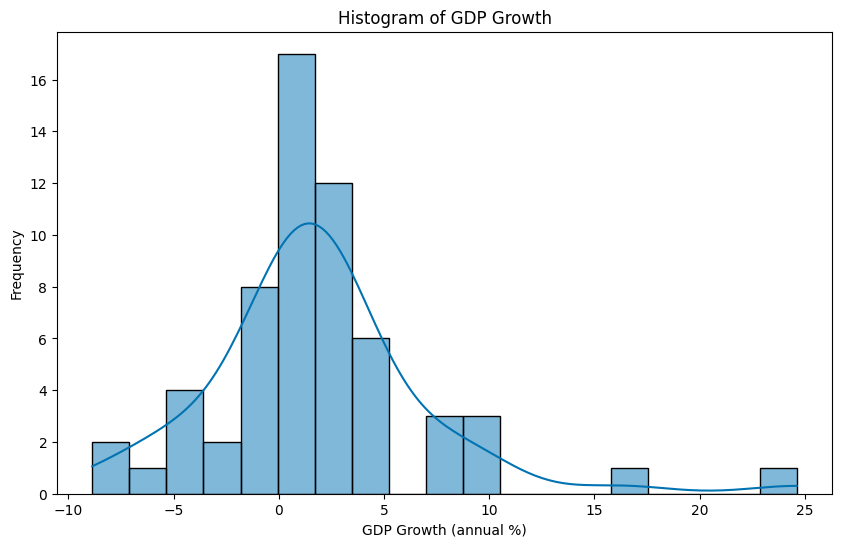

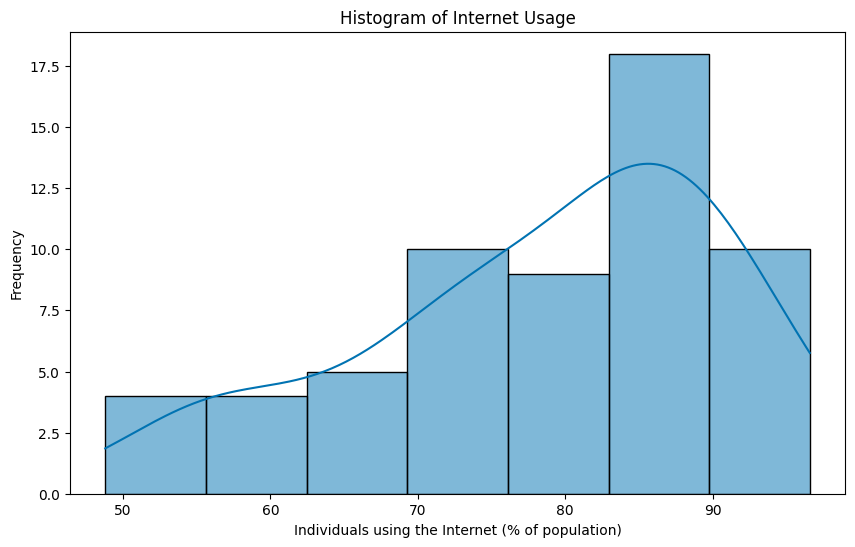

In [65]:
# histogram of GDP growth
plt.figure(figsize=(10, 6))
sns.histplot(df_pivot['gdp_Growth'], kde=True)
plt.title('Histogram of GDP Growth')
plt.xlabel('GDP Growth (annual %)')
plt.ylabel('Frequency')
plt.show()

# histogram of Internet usage
plt.figure(figsize=(10, 6))
sns.histplot(df_pivot['internet_Usage'], kde=True)
plt.title('Histogram of Internet Usage')
plt.xlabel('Individuals using the Internet (% of population)')
plt.ylabel('Frequency')
plt.show()

The distribution of the continuous variables of gdp_Growth and internet_Usage is visualised using a histogram. The histogram shows that the gdp_Growth data is normally distributed with a slight positive skewness, while the data of internet_Usage variable shows normally distributed with some negative skewness.

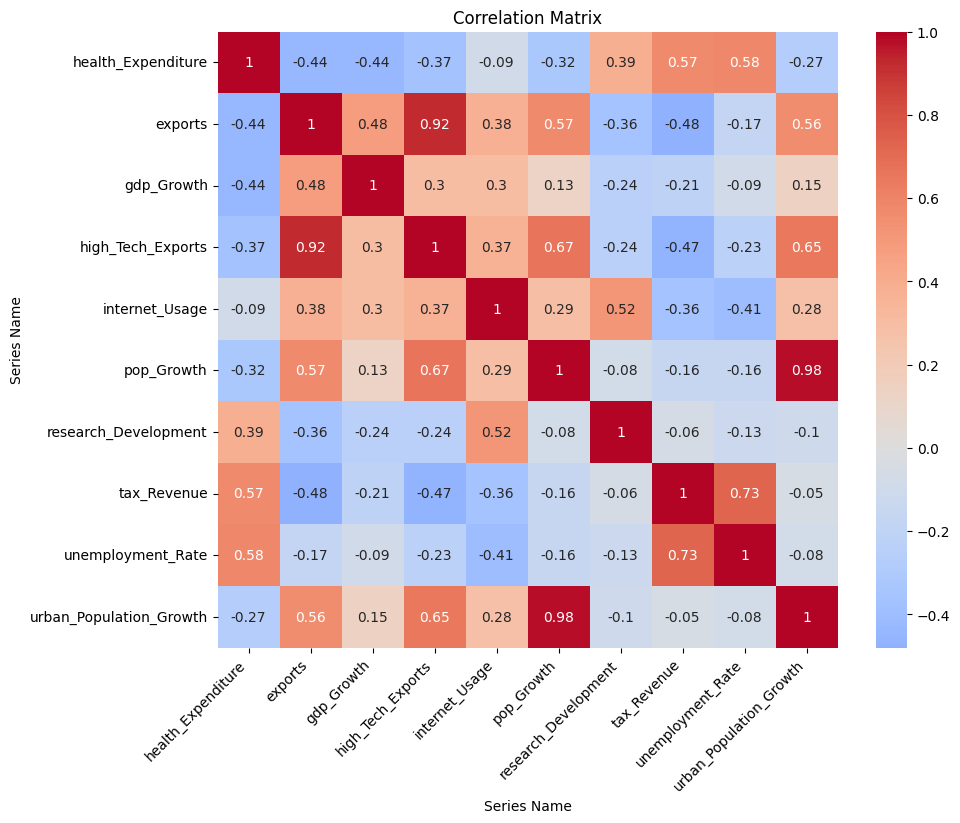

In [66]:
# correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)
plt.show()

Correlation matrix heatmap shows the correlation between all continuous variables. The x-ticks was rotated 45 degrees to the right to enhance readability. The correlation coefficient ranges from -1 to 1. The closer the value is to 1 or -1, the stronger the correlation. A value of 0 indicates no correlation between the variables. The heatmap shows that there is a strong positive correlation between tax revenue and health expenditure, tax revenue and unemployment rate, and high-tech exports and population growth, and a fairly strong negative correlation between internet usage and unemployment rate. 

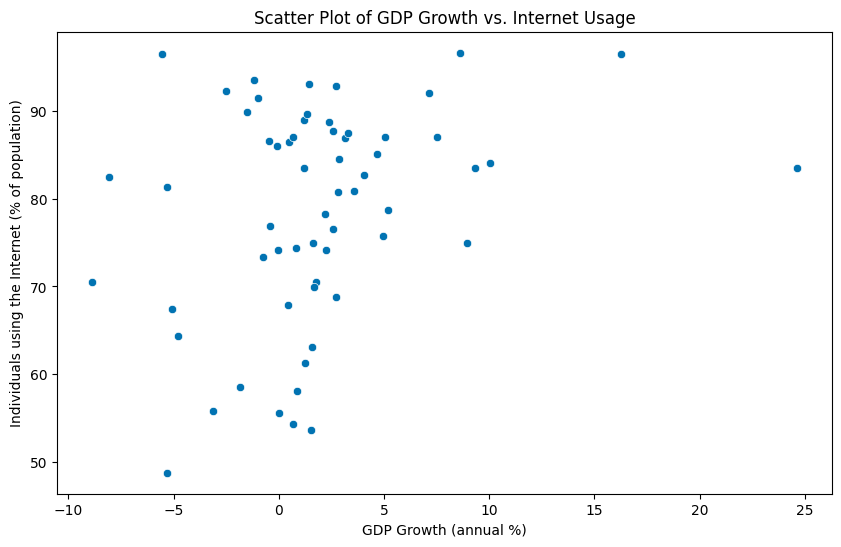

In [67]:
# scatter plot of GDP growth and Internet usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_Growth', y='internet_Usage', data=df_pivot)
plt.title('Scatter Plot of GDP Growth vs. Internet Usage')
plt.xlabel('GDP Growth (annual %)')
plt.ylabel('Individuals using the Internet (% of population)')
plt.show()

Scatter plot is used to show the relationship between the key variables of GDP Growth and Internet Usage. A positive relationship can be seen from the scatter plot. The plot shows that as internet usage increases, GDP growth also increases. The plot also shows that there are some outliers in the data.

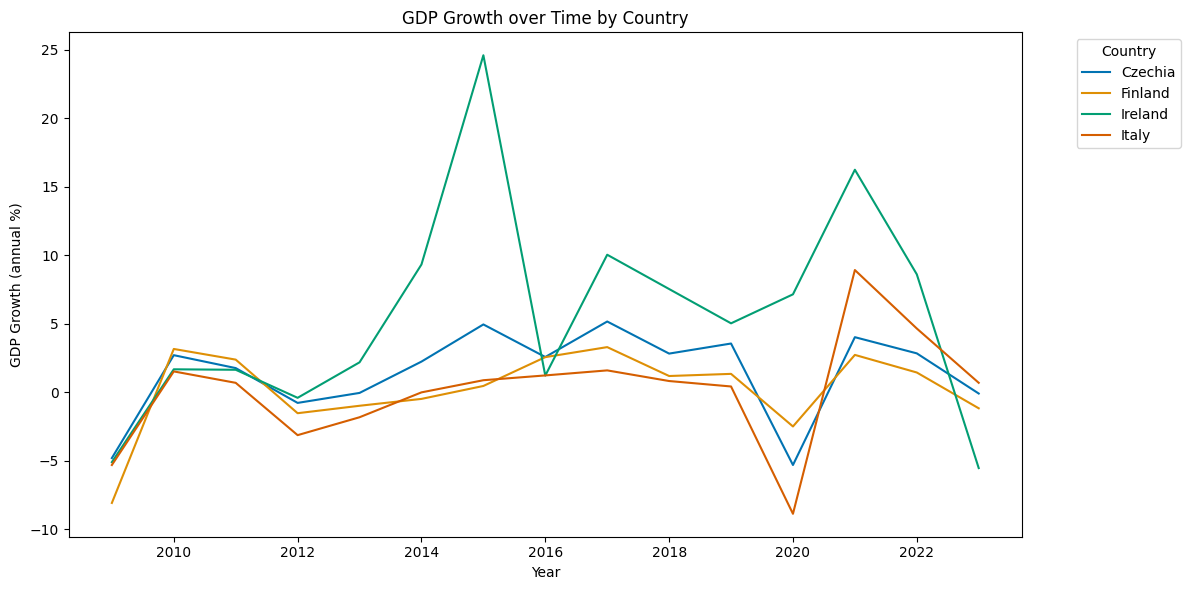

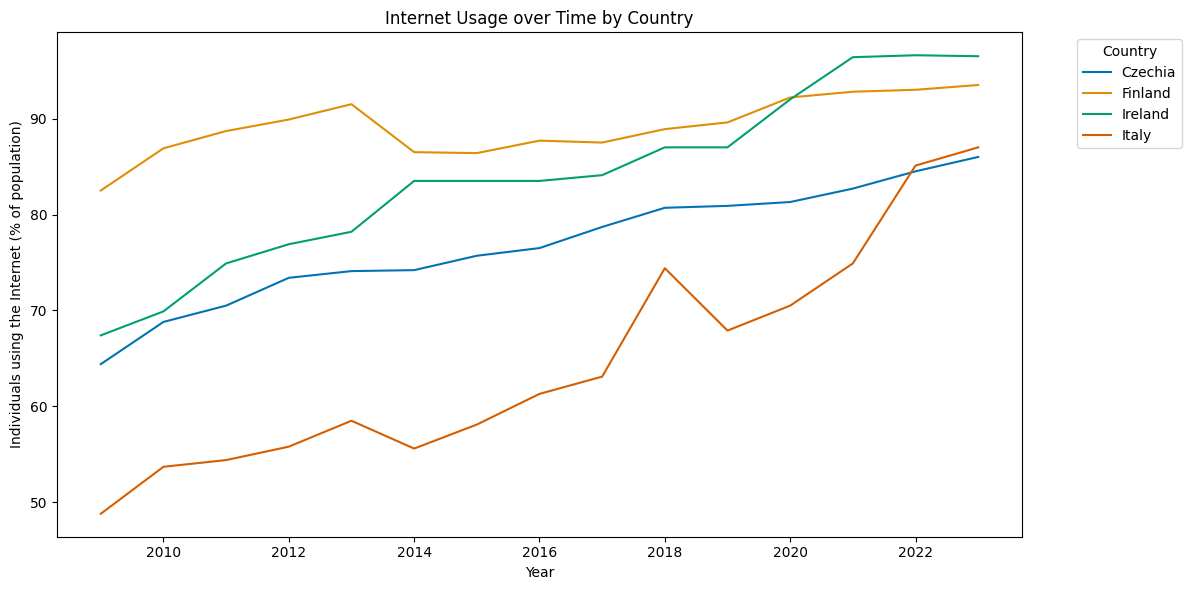

In [68]:
# line plot of GDP growth over time and by country

sns.set_palette('colorblind')

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='gdp_Growth', hue='country_Name', data=df_pivot)
plt.title('GDP Growth over Time by Country')
plt.xlabel('Year')
plt.ylabel('GDP Growth (annual %)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# line plot of Internet usage over time and by country

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='internet_Usage', hue='country_Name', data=df_pivot)
plt.title('Internet Usage over Time by Country')
plt.xlabel('Year')
plt.ylabel('Individuals using the Internet (% of population)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The line plot of GDP growth shows fluctuations in economic growth of all four EU countries over time with noticeable dips and peaks. The significant changes are around 2009 due to the financial crisis and around 2020 due to the COVID-19 pandemic. Ireland show the most extreme fluctuations with a masive spike in 2015 followed by a sharp drop in 2016 however, there was a notable increase in 2021. All four EU countries with the exception of Ireland show major dips in GDP gowth in 2020 with Italy showing the lowest. The line plot of internet usage shows a general steady increase in internet usage over time for all four EU countries with Czechia exhibiting steady increase without major fluctuations. The line plot of internet usage shows a general steady increase in internet usage over time for all four EU countries with Czechia exhibiting steady increase without major fluctuations and Italy showing significant increase in 2018.

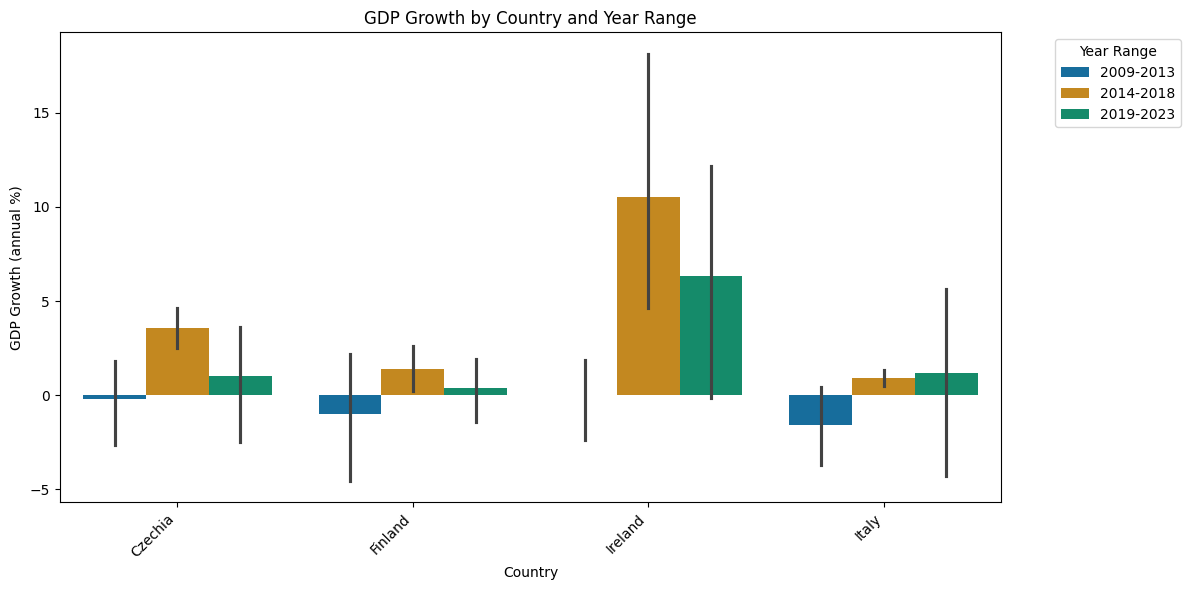

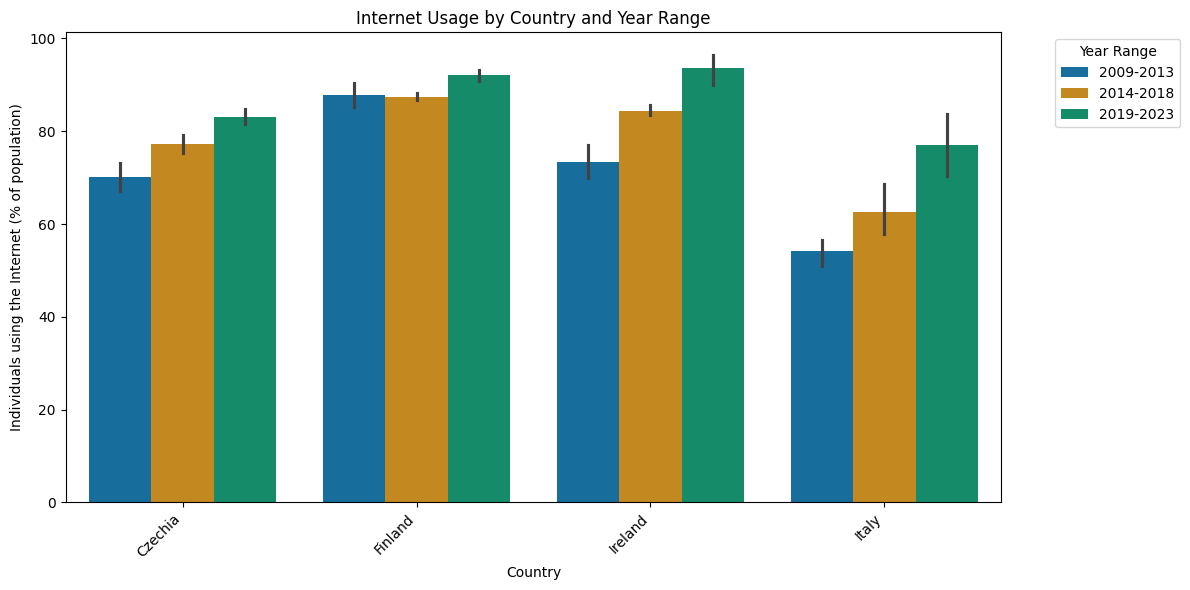

In [69]:
# multi-set bar plot of GDP growth by country and year range

# new column for year range (every 5 years)

df_pivot['year_range'] = pd.cut(df_pivot['year'], bins=range(2008, 2024, 5),
                                labels=[f'{i}-{i+4}' for i in range(2009, 2024, 5)])

# multi-set bar plot of GDP growth by country and year range

plt.figure(figsize=(12, 6))
sns.barplot(x='country_Name', y='gdp_Growth', hue='year_range', data=df_pivot)
plt.title('GDP Growth by Country and Year Range')
plt.xlabel('Country')
plt.ylabel('GDP Growth (annual %)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# multi-set bar plot of Internet usage by country and year range

plt.figure(figsize=(12, 6))
sns.barplot(x='country_Name', y='internet_Usage', hue='year_range', data=df_pivot)
plt.title('Internet Usage by Country and Year Range')
plt.xlabel('Country')
plt.ylabel('Individuals using the Internet (% of population)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The multi set bar plot of GDP growth shows economic growth of all four EU countries over three periods of 2009-2013, 2014-2018 and 2019-2023. All four countries experienced a dip in GDP growth in 2009-2013 with Ireland showing the highest growth in 2014-2018 and 2019-2023. The 2014-2018 was the strongest period for GDP growth across all four countries. Considering the multi set bar plot of internet usage (% of population), both Finland and Ireland had the highest internet usage even surpassing 90% in recent years. Czechia experience steady increase over three periods while Italy, though started with the lowest internet usage, it experienced the most substantial improvements.

<Figure size 1000x600 with 0 Axes>

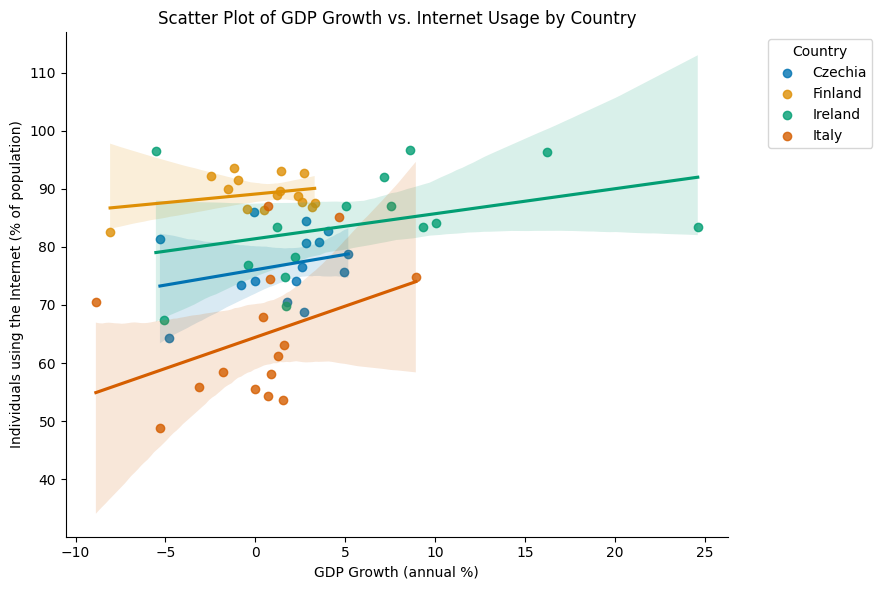

In [71]:
# scatter plot of GDP growth and Internet usage by country

plt.figure(figsize=(10, 6))
sns.lmplot(x='gdp_Growth', y='internet_Usage', hue='country_Name', data=df_pivot, height=6, aspect=1.5, legend=False)
plt.title('Scatter Plot of GDP Growth vs. Internet Usage by Country')
plt.xlabel('GDP Growth (annual %)')
plt.ylabel('Individuals using the Internet (% of population)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The scatter plot show a positive relationship between GDP Growth and Internet Usage for all four EU countries. Ireland shows the highest GDP Growth and Internet Usage, while Italy, though with lower internet usage, shows the strongest positive correlation. Countries with already high internet penetration such as Finland and Czechia show relatively weaker correlation between GDP Growth and Internet Usage.

In [72]:
# hypothesis testing

# null hypothesis (H0): No significant difference in the mean GDP growth between the four countries.

countries = ['Czechia', 'Finland', 'Ireland', 'Italy']
df_countries = df_pivot[df_pivot['country_Name'].isin(countries)]

# one-way ANOVA test to compare the mean GDP growth between the four countries
f_statistic, p_value = stats.f_oneway(df_countries[df_countries['country_Name'] == 'Czechia']['gdp_Growth'],
                                      df_countries[df_countries['country_Name'] == 'Finland']['gdp_Growth'],
                                      df_countries[df_countries['country_Name'] == 'Ireland']['gdp_Growth'],
                                      df_countries[df_countries['country_Name'] == 'Italy']['gdp_Growth'])

print('\nOne-way ANOVA Test for GDP Growth:')
print(f'F-Statistic: {f_statistic}')
print(f'P-Value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in the mean GDP growth between the four countries.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in the mean GDP growth between the four countries.')
    

# null hypothesis (H0): No significant difference in the mean Internet usage between the four countries.

# one-way ANOVA test to compare the mean Internet usage between the four countries
f_statistic, p_value = stats.f_oneway(df_countries[df_countries['country_Name'] == 'Czechia']['internet_Usage'],
                                      df_countries[df_countries['country_Name'] == 'Finland']['internet_Usage'],
                                      df_countries[df_countries['country_Name'] == 'Ireland']['internet_Usage'],
                                      df_countries[df_countries['country_Name'] == 'Italy']['internet_Usage'])

print('\nOne-way ANOVA Test for Internet Usage:')
print(f'F-Statistic: {f_statistic}')
print(f'P-Value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in the mean Internet usage between the four countries.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in the mean Internet usage between the four countries.')

# null hypothesis (H0): no significant correlation between GDP growth and Internet usage.

# pearson correlation test between GDP growth and Internet usage
correlation, p_value = stats.pearsonr(df_pivot['gdp_Growth'], df_pivot['internet_Usage'])

print('\nPearson Correlation Test:')
print(f'Correlation Coefficient: {correlation}')
print(f'P-Value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant correlation between GDP growth and Internet usage.')
else:
    print('Fail to reject the null hypothesis: There is no significant correlation between GDP growth and Internet usage.')

# save data to new excel file
df_pivot.to_excel('data_cleaned.xlsx', index=False)
print('\nData saved to "data_cleaned.xlsx" successfully.')


One-way ANOVA Test for GDP Growth:
F-Statistic: 4.098918974222882
P-Value: 0.010625802183477471
Reject the null hypothesis: There is a significant difference in the mean GDP growth between the four countries.

One-way ANOVA Test for Internet Usage:
F-Statistic: 25.33549937495383
P-Value: 1.7374945854705526e-10
Reject the null hypothesis: There is a significant difference in the mean Internet usage between the four countries.

Pearson Correlation Test:
Correlation Coefficient: 0.29808722426261314
P-Value: 0.02070817690948009
Reject the null hypothesis: There is a significant correlation between GDP growth and Internet usage.

Data saved to "data_cleaned.xlsx" successfully.


The one way ANOVA test shows significant differences in both GDP Growth and Internet Usage among the four EU countries. The p-values of both tests are less than 0.05, indicating that these differences are statistically significant. The Pearson correlation test shows a positive correlation between GDP Growth and Internet Usage, with a correlation coefficient of 0.298 and a p-value of less than 0.05, indicating weak but statistically significant correlation.

A Short Summary: Analysis of relationship between Economic Growth and Internet Usage  

Introduction

This analysis examines the relationship between economic growth, measured by GDP growth, and internet usage across four European Union (EU) countries – Czechia (East), Finland (North), Ireland (West), Italy (South) – from 2009 to 2023. The goal is to explore the relationship between these two variables on a country-by-country basis. However, data was collected on eight additional control variables to observe if there are other interesting insights.

Data 

The panel dataset was sourced from the World Bank website (World Bank, 2025), cleaned, and reshaped into a long format for analysis. Missing values were imputed using the average value of the affected variables. The primary variables of interest were GDP growth (annual %) and internet usage (percentage of the population using the internet). Descriptive statistics indicate that GDP growth varied across the four countries, while internet usage showed a general upward trend over the 15-year period.

Visual Insights

Descriptive and relationship analyses of the variables across the countries were effectively visualized using appropriate plots. The multi-set bar chart for GDP growth highlights significant variability between the countries, with some experiencing negative or low growth. Ireland exhibited the highest GDP growth during both 2014-2018 and 2019-2023. When it comes to internet usage, Finland and Ireland consistently had the highest usage, though all four countries showed an overall increase over the period.
The boxplot for GDP growth revealed several outliers, but these were deemed meaningful to the analysis of economic growth and were therefore left unchanged. Line plots indicated a generally steady increase in internet usage across all four countries over the 15-year period, though each country experienced varying levels of fluctuation. Ireland showed higher volatility, while Czechia, Finland, and Italy faced significant dips in GDP growth during 2020.
The correlation matrix heatmap was used to show the strength of relationship between continuous variables, while the scatter plot depicted the positive correlation between the key variables of GDP growth and internet usage, as well as highlighting differences between countries. 

Statistical Tests

The one-way ANOVA test revealed significant differences in both GDP growth and internet usage between the four countries, with p-values less than 0.05. Additionally, the Pearson correlation test showed a significant positive correlation (0.298, p-value < 0.05), indicating that higher economic growth is associated with increased internet usage.

Conclusion 

In conclusion, the analysis suggests a positive relationship between economic growth and internet usage, although this varies by country, especially due to the impacts of the 2008 financial crisis and the COVID-19 pandemic. The widespread use of the internet reflects growing technology adoption, which is typically linked to economic growth improvements.


References

1. Ford, C. (2025). *Exploratory data analysis and statistics* [IS41570_lab_3]. University College Dublin.

2. GeeksforGeeks. (n.d.). *Reshape a wide dataframe to long in Pandas*. Retrieved from
 
     https://www.geeksforgeeks.org/reshape-a-wide-dataframe-to-long-in-pandas/

3. Kaggle. (n.d.). *Data Visualization*. Retrieved from
     
     https://www.kaggle.com/learn/data-visualization

2. World Bank. (2025). *World Development Indicators*. Retrieved from

     https://databank.worldbank.org/source/world-development-indicators